In [98]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [99]:
from typing import List, Dict, Any
import sys
import os
sys.path.append('..')
from wyscout.events import get_key_pass_events
from wyscout.match import get_match_events, get_team_matches, get_match_details
from wyscout.api import set_auth

In [100]:
SOUTHEND = 1687
SEASON_2022 = 188172

In [101]:
from wyscout.team import get_team_squad
squad = get_team_squad(SOUTHEND, SEASON_2022)
squad = {p["wyId"]: p for p in squad["squad"]}

In [102]:
def get_key_passes():
    matches = get_team_matches(SOUTHEND, SEASON_2022)
    key_pass_events = []
    for m in matches["matches"]:
        events = get_match_events(m["matchId"])
        if "events" in events:
            key_pass_events.append(get_key_pass_events(
                m, events["events"], SOUTHEND))
    return key_pass_events

In [137]:
matches = get_team_matches(SOUTHEND, SEASON_2022)

In [ ]:
get_match_events(5368977)

In [140]:
def get_touches_in_box():
    matches = get_team_matches(SOUTHEND, SEASON_2022)
    touches_in_box = {}
    for m in matches["matches"]:
        events = get_match_events(m["matchId"])
        if "events" in events:
            for e in events["events"]:
                if e["team"]["id"] == SOUTHEND and "touch_in_box" in (e["type"]["secondary"]):
                    if e["player"]["name"] not in touches_in_box.keys():
                        touches_in_box[e["player"]["name"]] = 0
                    touches_in_box[e["player"]["name"]] += 1
    return touches_in_box

In [141]:
get_touches_in_box()

{'C. Wreh': 46,
 'C. Powell': 90,
 'G. Scott-Morriss': 36,
 'C. Miley': 9,
 'J. Bridge': 64,
 'W. Fonguck': 19,
 'K. Łopata': 17,
 'S. Hobson': 23,
 'H. Taylor': 3,
 'H. Cardwell': 6,
 'D. Mooney': 42,
 'N. Ralph': 13,
 'O. Kensdale': 8,
 'A. Cosgrave': 6,
 'J. Hyde': 25,
 'M. Dackers': 24,
 'Noor Husin': 7,
 'J. Demetriou': 2,
 'L. Lomas': 4,
 'T. Clifford': 3,
 'J. Crowhurst': 1}

In [103]:
matches = get_key_passes()

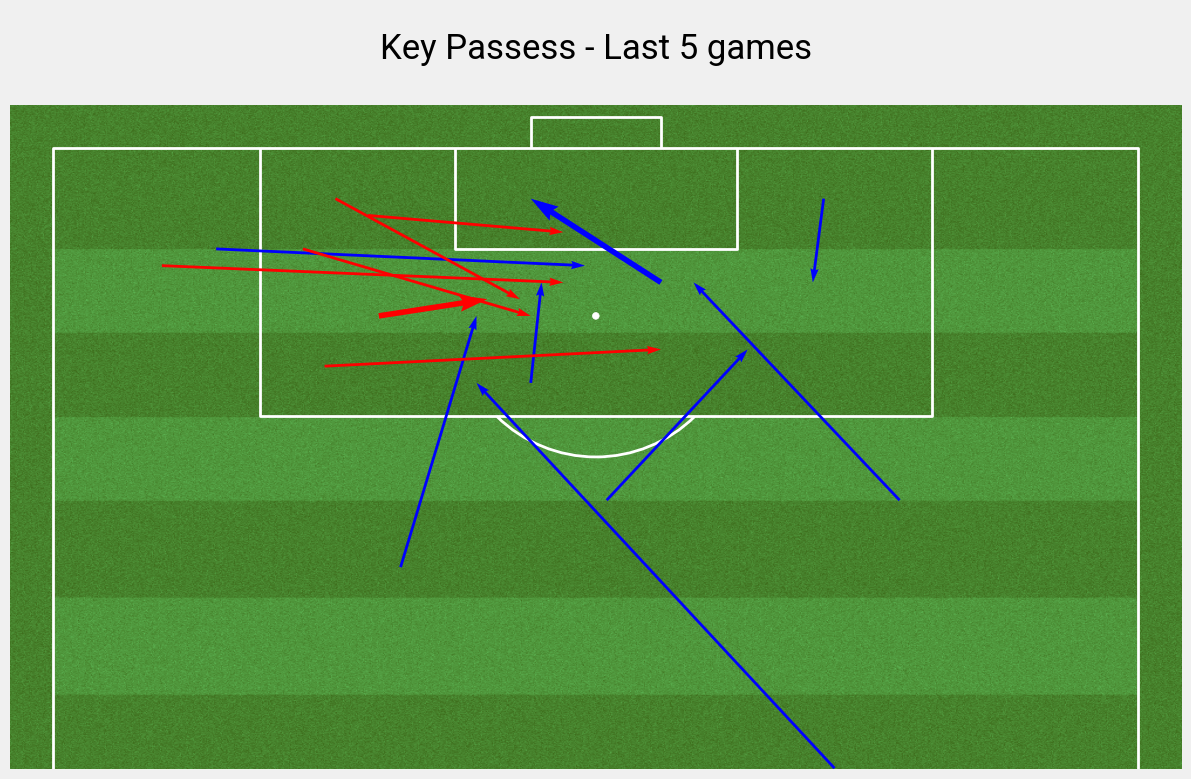

In [30]:
from wyscout.viz.key_passes import plot_key_passes

plot_key_passes(matches, 5, ["J. Bridge"])

In [31]:
def get_shots(all_events = False):
    matches = get_team_matches(SOUTHEND, SEASON_2022)
    events_out = []
    for m in matches["matches"]:
        events = get_match_events(m["matchId"])
        if "events" in events:
            events_out.append({
                "matchId": m["matchId"],
                "date": m["date"],
                "label": m["label"],
                "events": [e for e in events["events"] if e["team"]["id"] == SOUTHEND] if not all_events else events["events"]
            })
    return events_out

In [32]:
match_events = get_shots()

In [33]:
event = [e for e in match_events[4]["events"] if e["type"]["primary"] == "shot"][0]

In [34]:
from wyscout.events import get_video_for_event

get_video_for_event(event)

{'matchId': 5368947,
 'hd': {'url': 'https://cdn5lb.wyscout.com/streaming/g5368947-hd.mp4?vbegin=301&vend=311&ttkid=2578245&Expires=1669057346&Signature=bvrOuCZHVa4kErWJGKE~AyroPMmIqG6u3TZ-DVfKHlr3Px5gHqDMmiZj7GNushlJSkkC91uTxn6d0p4c8~ZfQFLBX5JLJzFFE0zu~dqvtG405UJVeE3XNoq7YP~5O71tcNaFebmHdgu3Uu63JUlZY4ZRHd2Bwn-xeh4xiK4C2fepKPI~SLPX90h9vAPPmanyhiuSQ2tv5nOk65z7mj3NGz1XNqi82YhuK0PqvGOpdEVJX7kU~kp~aUHmQ1vBiHCK6cuPZyZXTZFW0O~GgvVIcZlmbZDWjGhfinjG3CplKtnAJAOYOuKPuI4tYysr74lFDuuI~e6vzDLVhisMoSPPNQ__&Key-Pair-Id=APKAIUKTLL554SMHRIGQ'},
 'offsets': {'1H': {'start': 2, 'end': 2832},
  '2H': {'start': 2834, 'end': 5873},
  'E1': {'start': 0, 'end': 0},
  'E2': {'start': 0, 'end': 0},
  'P': {'start': 0, 'end': 0}}}

In [35]:
for i, m in enumerate([m["label"] for m in match_events]):
    print(i,m)

0 Gateshead - Southend United, 3-1
1 Southend United - Dorking Wanderers, 2-0
2 Southend United - Notts County, 2-2
3 Barnet - Southend United, 0-3
4 York City - Southend United, 0-2
5 Maidstone United - Southend United, 0-3
6 Southend United - Scunthorpe United, 3-0
7 Dagenham & Redbridge - Southend United, 1-1
8 Southend United - Woking, 1-1
9 Southend United - Yeovil Town, 1-0
10 Wealdstone - Southend United, 0-1
11 Southend United - Wrexham, 0-0
12 Chesterfield - Southend United, 3-2
13 Southend United - Torquay United, 1-2
14 Southend United - Maidenhead United, 2-0
15 Eastleigh - Southend United, 2-1
16 Southend United - Oldham Athletic, 1-0
17 Halifax Town - Southend United, 0-0
18 Solihull Moors - Southend United, 1-1
19 Southend United - Boreham Wood, 0-1


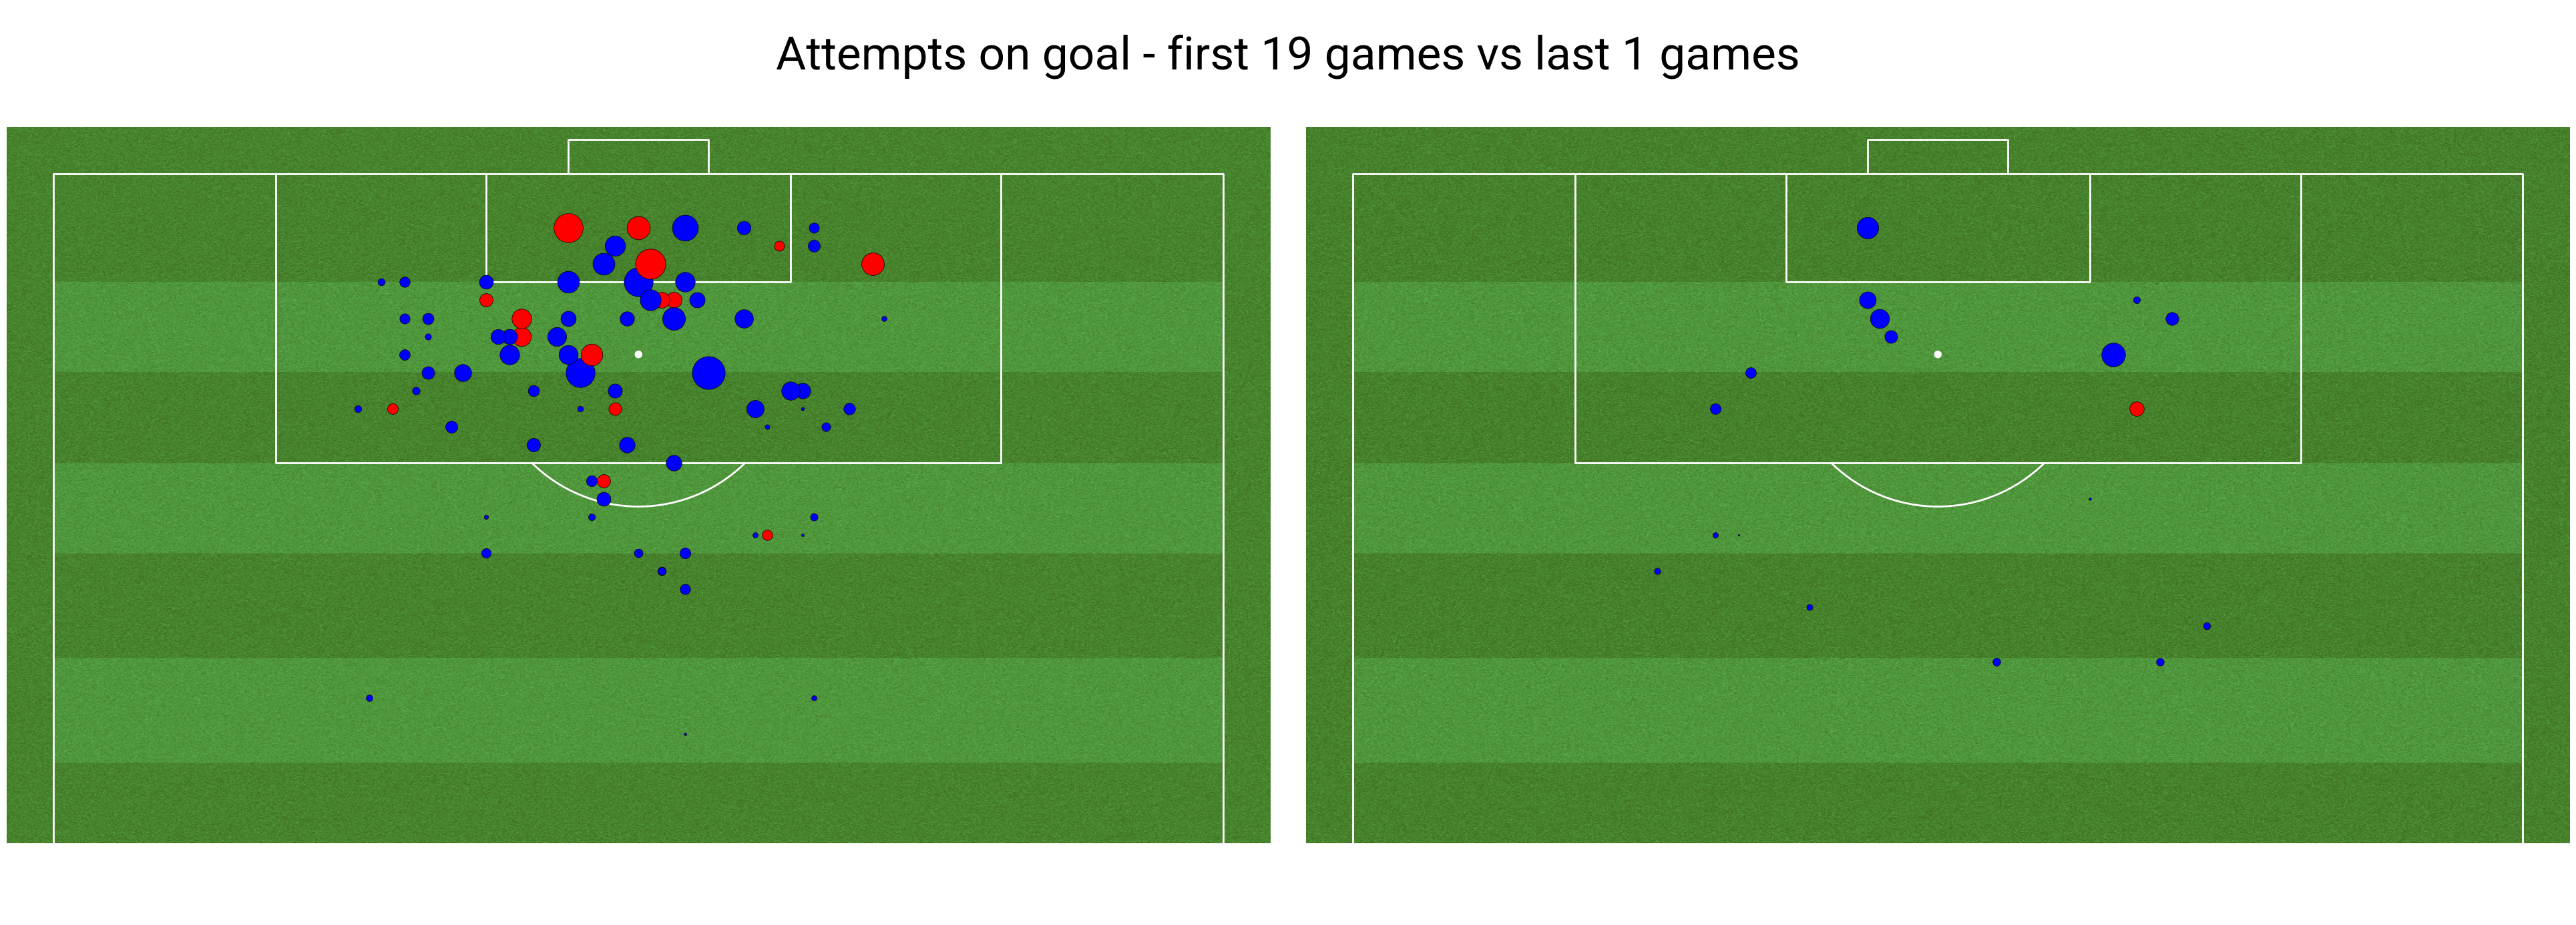

In [36]:
from wyscout.viz.shots import plot_shots_compare, plot_match_chances

plot_shots_compare(match_events, 1)

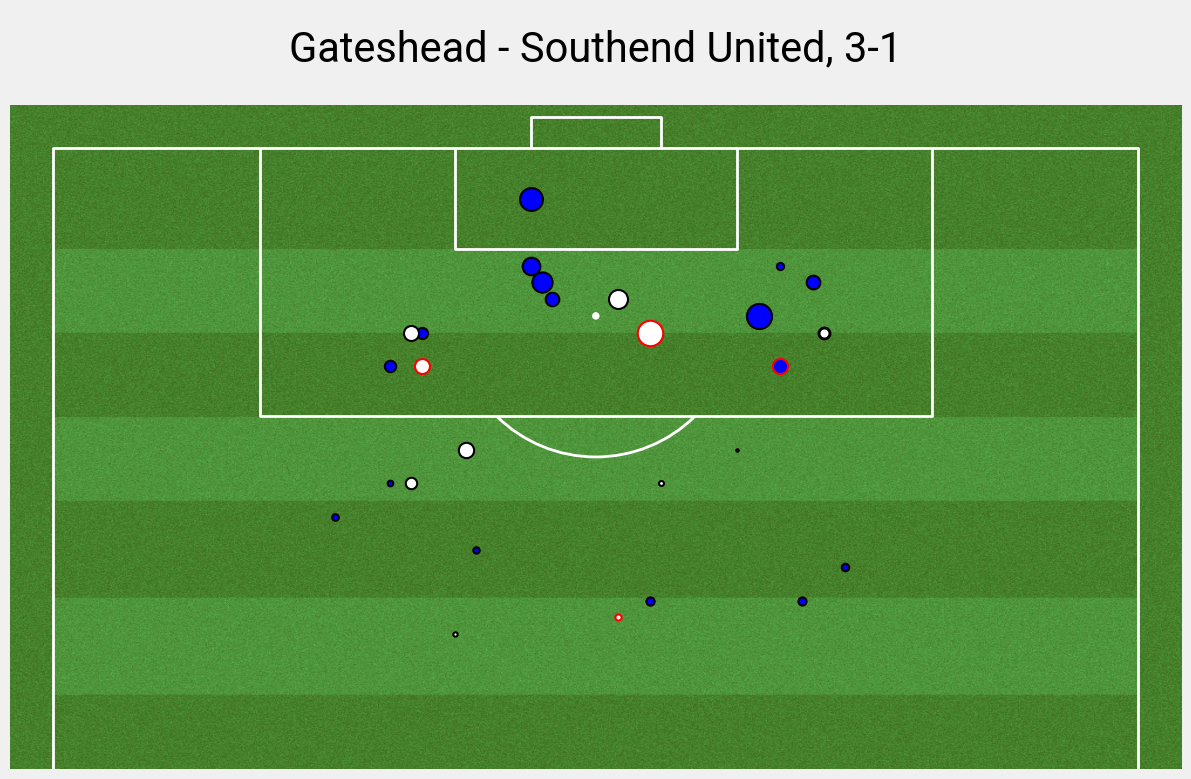

In [42]:
match_events = get_shots(True)
plot_match_chances(match_events[0], SOUTHEND, True, ["blue", "white"]) 

In [38]:
from statistics import mean
for i, m in enumerate(match_events[:]):
    shots = [e for e in m["events"] if e["type"]["primary"] in ["shot"]]
    m["total_shots"] = len(shots)
    m["goals"] = len([s for s in shots if s["shot"]["isGoal"] == True ])
    m["average_xg"] = mean([s["shot"]["xg"] for s in shots])
    m["total_xg"] = sum([s["shot"]["xg"] for s in shots])

In [39]:
for m in match_events:
    print(m["label"], m["total_shots"], m["goals"], m["average_xg"], m["total_xg"])

Gateshead - Southend United, 3-1 29 4 0.09366837931034483 2.716383
Southend United - Dorking Wanderers, 2-0 19 1 0.1108021052631579 2.1052399999999993
Southend United - Notts County, 2-2 20 4 0.092475605 1.8495121
Barnet - Southend United, 0-3 20 2 0.11472399999999999 2.29448
York City - Southend United, 0-2 16 2 0.14625037500000002 2.3400060000000007
Maidstone United - Southend United, 0-3 22 3 0.1157464090909091 2.546421
Southend United - Scunthorpe United, 3-0 14 3 0.13873321428571428 1.9422650000000001
Dagenham & Redbridge - Southend United, 1-1 23 2 0.11294908695652174 2.597829
Southend United - Woking, 1-1 20 2 0.07981178 1.5962356
Southend United - Yeovil Town, 1-0 20 1 0.1178407 2.3568139999999995
Wealdstone - Southend United, 0-1 23 0 0.1521367391304348 3.4991449999999995
Southend United - Wrexham, 0-0 20 0 0.0630652 1.2613039999999995
Chesterfield - Southend United, 3-2 22 5 0.1104695909090909 2.4303309999999994
Southend United - Torquay United, 1-2 34 3 0.10165658823529412 3

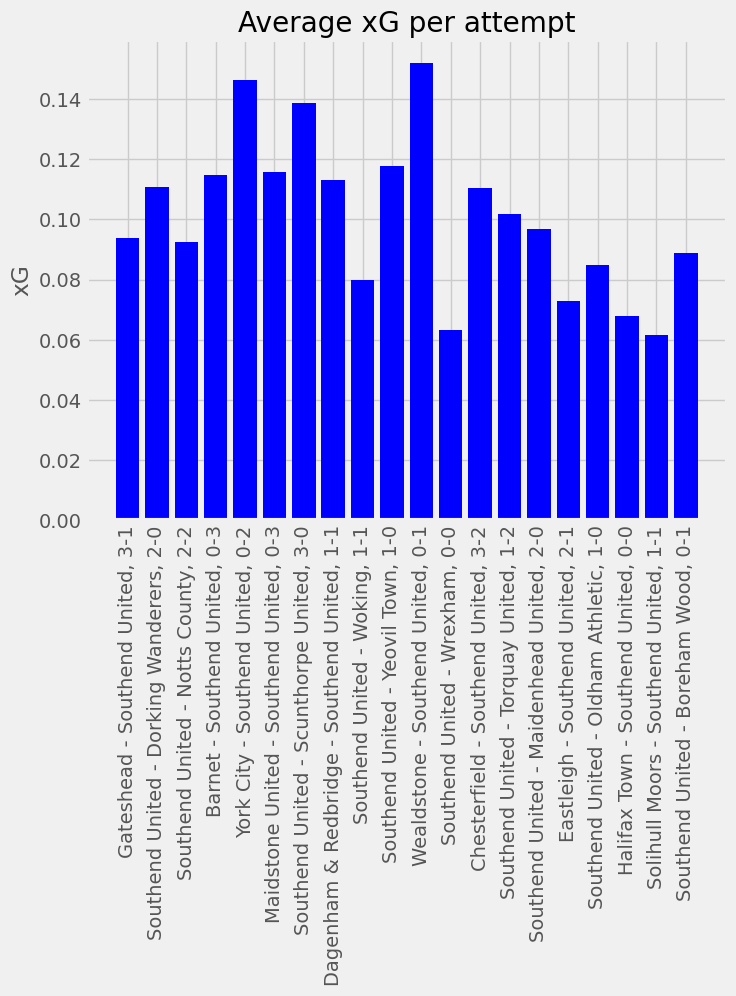

In [40]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.bar(
    [m["label"] for m in match_events],
    [m["average_xg"] for m in match_events],
    color=["blue"]
)
plt.xticks(rotation=90)
plt.title("Average xG per attempt")
plt.ylabel("xG")
plt.style.use("fivethirtyeight")
plt.show()

In [95]:
def get_match_details_with_teams(match_id: int) -> Dict[int, Any]:
    match_details = get_match_details(match_id)
    team_ids = list(match_details["teamsData"].keys())
    squads = {
        t: get_team_squad(t, match_details["seasonId"])
        for t in team_ids
    }
    for k in squads.keys():
        squads[k] = {p["wyId"]: p for p in squads[k]["squad"]}
    for t_id in match_details["teamsData"]:
        players = {}
        keys = ["lineup", "bench"]
        for k in keys:
            for p in match_details["teamsData"][t_id]["formation"][k]:
                p["playerDetails"] = squads[t_id][p["playerId"]]
                players[p["playerId"]] = p
        match_details["teamsData"][t_id]["players"] = players
    return match_details

In [96]:
get_match_details(match_events[0]["matchId"])["teamsData"]["1806"]["formation"].keys()

dict_keys(['lineup', 'bench', 'substitutions'])

In [97]:
get_match_details_with_teams(match_events[0]["matchId"])

{'wyId': 5368977,
 'label': 'Gateshead - Southend United, 3 - 1',
 'date': 'November 19, 2022 at 4:00:00 PM GMT+1',
 'dateutc': '2022-11-19 15:00:00',
 'status': 'Played',
 'duration': 'Regular',
 'winner': 1806,
 'competitionId': 351,
 'seasonId': 188172,
 'roundId': 4426995,
 'gameweek': 20,
 'teamsData': {'1806': {'teamId': 1806,
   'side': 'home',
   'score': 3,
   'scoreHT': 0,
   'scoreET': 0,
   'scoreP': 0,
   'coachId': 673857,
   'hasFormation': 1,
   'formation': {'lineup': [{'playerId': 678715,
      'goals': '0',
      'ownGoals': '0',
      'yellowCards': '0',
      'redCards': '0',
      'shirtNumber': 15,
      'assists': '0',
      'playerDetails': {'wyId': 678715,
       'shortName': 'A. Martin',
       'firstName': 'Aaron',
       'middleName': '',
       'lastName': 'Martin',
       'height': 183,
       'weight': 0,
       'birthDate': '1991-07-05',
       'birthArea': {'id': 826,
        'alpha2code': 'EN',
        'alpha3code': 'XEN',
        'name': 'England'},


In [75]:
get_match_details(match_events[0]["matchId"])

{'wyId': 5368977,
 'label': 'Gateshead - Southend United, 3 - 1',
 'date': 'November 19, 2022 at 4:00:00 PM GMT+1',
 'dateutc': '2022-11-19 15:00:00',
 'status': 'Played',
 'duration': 'Regular',
 'winner': 1806,
 'competitionId': 351,
 'seasonId': 188172,
 'roundId': 4426995,
 'gameweek': 20,
 'teamsData': {'1806': {'teamId': 1806,
   'side': 'home',
   'score': 3,
   'scoreHT': 0,
   'scoreET': 0,
   'scoreP': 0,
   'coachId': 673857,
   'hasFormation': 1,
   'formation': {'lineup': [{'playerId': 678715,
      'goals': '0',
      'ownGoals': '0',
      'yellowCards': '0',
      'redCards': '0',
      'shirtNumber': 15,
      'assists': '0'},
     {'playerId': 726986,
      'goals': '0',
      'ownGoals': '0',
      'yellowCards': '0',
      'redCards': '0',
      'shirtNumber': 19,
      'assists': '0'},
     {'playerId': 12688,
      'goals': '0',
      'ownGoals': '0',
      'yellowCards': '26',
      'redCards': '0',
      'shirtNumber': 32,
      'assists': '0'},
     {'playerId'

5368977